# ZUBER

<b>
Objetivo: encontrar padrões nas informações disponíveis, entender as preferências dos passageiros e o impacto de fatores externos nas corridas.

#  Passo 1. Verificando dados no em um site - Python

 Análise dos dados sobre o clima em Chicago em novembro de 2017.
 
#  Passo 2. Análise exploratória de dados - SQL

 - Verificar o número de corridas de táxi para cada empresa entre 15 e 16 de novembro de 2017
 - Verificar o número de corridas cujos nomes das companhias contenham as palavras YELLOW e BLUE
 - Verificando as corridas das companhias mais populares
 
#  Passo 3. Análise exploratória de dados - SQL

 - Verificando os indentificadores dos bairros O'Hare e Loop
 - Verificando as condições meteorológicas e alterando pra BAD (chuva/tempestade) e GOOD(outros)
 - Verificando as corridas que começam no Loop e terminam em O'Hare aos sábados, bem como as condições meteorológicas


#  Passo 4. Análise exploratória de dados - Python

  Além dos dados recuperados nas tarefas anteriores, dois CSVs:

- project_sql_result_01.csv. Ele contém os seguintes dados:
     
   - company_name: nome da empresa de táxi
   - trips_amount: o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017.
    
- project_sql_result_04.csv. Ele contém os seguintes dados:
   
   - dropoff_location_name: bairros de Chicago onde as corridas terminaram
   - average_trips: o número médio de viagens que terminaram em cada bairro em novembro de 2017.
        
Para esses dois conjuntos de dados:
- importar os arquivos
- estudar os dados que eles contêm
- verifique se os tipos de dados estão corretos
- identificar os 10 principais bairros em termos de destinos
- fazer gráficos: empresas de táxi e número de corridas, 10 principais bairros por número de corridas em que esse - bairro é destino
- tirar conclusões com base em cada gráfico e explicar os resultados


# Passo 5. Testando hipóteses - Python

Para esse passo, será utilizado o arquivo que contém dados sobre viagens do Loop para o Aeroporto Internacional O'Hare:

- project_sql_result_07.csv - Valores dos campos da tabela:
    - start_ts — data e hora do começo da corrida
    - weather_conditions — condições meteorológicas no momento em que a corrida começou
    - duration_seconds — duração da viagem em segundos


<b>Teste a hipótese: "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos."
<b>

Explique:
   - como você formou as hipóteses nula e alternativa
   - qual critério você usou para testar a hipótese e porque
   - Alpha: a critério

## Início

### Carregando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math as mt
import seaborn as sns

### Carregando os dados

#### Arquivo das corridas realizadas entre 15 e 16 de novembro (trips)

In [2]:
#Carregando o arquivo .csv e renomeando
trips = pd.read_csv('/datasets/project_sql_result_01.csv')
locations = pd.read_csv('/datasets/project_sql_result_04.csv')
loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')

## Explorando os dados

### Informações gerais / resumidas

In [3]:
#Amostra do conjunto de dados
trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
#Informações gerais
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
#Descrição Geral
trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
#Verficando valores ausentes
trips.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [7]:
#Valores duplicados
trips.duplicated().sum()

0

In [8]:
#Amostra do conjunto de dados
locations.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [9]:
#Informações gerais
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
#Descrição Geral
locations.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [11]:
#Verficando valores ausentes
locations.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [12]:
#Valores duplicados
locations.duplicated().sum()

0

Pelas informações detalhadas dos arquivos 'locations' e 'trips', percebe-se a consistência dos dados, pois não há valores duplicados, não há valores nulos ou ausentes e os tipos das colunas estão coerentes com o tipo de dado.

## Analisando os dados

In [13]:
#Analisando os 10 maiores emresas em número de corridas
trips. sort_values(by='trips_amount', ascending=False).head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


[Text(0.5, 1.0, 'Número de corridas por Empresas de Táxi')]

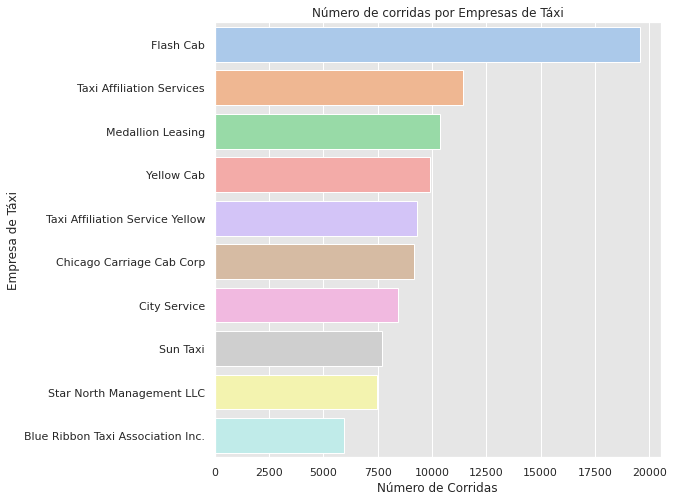

In [29]:
fig,aa = plt.subplots(figsize=(8,8))
sns.set_theme(style="darkgrid", palette="pastel")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
aa = sns.barplot(x = 'trips_amount', y='company_name', data=trips.sort_values(by='trips_amount', ascending=False).head(10))
aa.set(xlabel='Número de Corridas', ylabel='Empresa de Táxi')
aa.set(title="Número de corridas por Empresas de Táxi")

In [15]:
trips['percent'] = ((trips['trips_amount'] / trips['trips_amount'].sum())*100)
trips.head(10)

,company_name,trips_amount,percent
0,Flash Cab,19558,14.243578
1,Taxi Affiliation Services,11422,8.318343
2,Medallion Leasing,10367,7.550014
3,Yellow Cab,9888,7.201171
4,Taxi Affiliation Service Yellow,9299,6.772218
5,Chicago Carriage Cab Corp,9181,6.686282
6,City Service,8448,6.152457
7,Sun Taxi,7701,5.608436
8,Star North Management LLC,7455,5.429281
9,Blue Ribbon Taxi Association Inc.,5953,4.335414


Pelas informações do gráfico e tabelas, percebe-se um grande domínio da empresa Flash Cab no mercado de transporte, com 14,2% de todas as corridas no período. Com relação às demais empresas, há uma distribuição bem homogênea, tendo uma distribuição variando de 4,3 (10º empresa) e chegando a 8,3% (2º empresa).

In [16]:
#Analisando os 10 bairros com o maior número médio de corridas
locations.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


[Text(0.5, 1.0, 'Média de Corridas nos Bairros')]

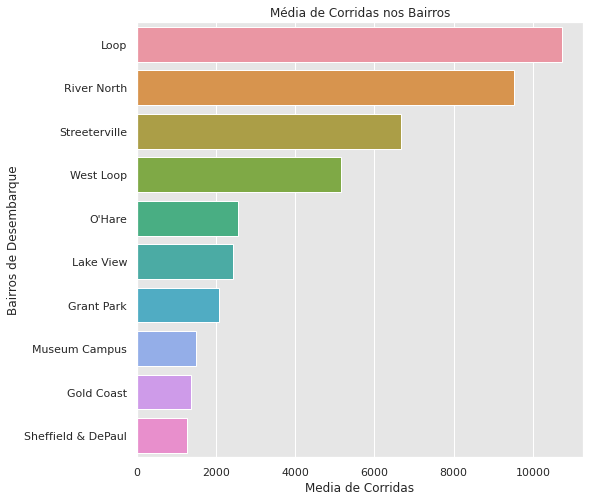

In [17]:
fig,zz = plt.subplots(figsize=(8,8))
sns.set_theme(style="darkgrid", palette="Pastel1_r")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
zz = sns.barplot(x = 'average_trips', y='dropoff_location_name', data=locations.sort_values(by='average_trips', ascending=False).head(10))
zz.set(xlabel='Media de Corridas', ylabel='Bairros de Desembarque')
zz.set(title="Média de Corridas nos Bairros")

In [18]:
locations['percent'] = ((locations['average_trips'] / locations['average_trips'].sum())*100)
locations.head(10)

,dropoff_location_name,average_trips,percent
0,Loop,10727.466667,19.021798
1,River North,9523.666667,16.887236
2,Streeterville,6664.666667,11.817696
3,West Loop,5163.666667,9.156143
4,O'Hare,2546.900000,4.516128
5,Lake View,2420.966667,4.292825
6,Grant Park,2068.533333,3.667895
7,Museum Campus,1510.000000,2.677511
8,Gold Coast,1364.233333,2.419040
9,Sheffield & DePaul,1259.766667,2.233801


Analisando as tabelas e gráfico gerado dos locais de desembarque ao longo do mês, nota-se que o Loop lidera com 19% dos destinos preferidos. As 3 primeiras posições somadas, detém quase 50% dos destinos preferidos pelos viajantes. Detalhe que as 3 primeiras são regiões centrais de Chicago.

## Teste de Hipótese

### Informações gerais / resumidas

In [19]:
#Amostra do conjunto de dados
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [20]:
#Informações gerais
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [21]:
#Descrição Geral
loop_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [22]:
#Verficando valores ausentes
loop_ohare.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Pelas informações detalhadas do arquivo 'loop_ohare', apesar de não haver valores nulos ou ausentes, os tipo de dado não estão coerentes, havendo a neessidade de alteração.

### Corrigindo os dados e separando pelo clima

In [23]:
#Convertendo a coluna data para o tipo datetime
loop_ohare['start_ts'] = pd.to_datetime(loop_ohare['start_ts'], format='%Y/%m/%d %H:%M:%S')
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [24]:
#Verificando o dia da semana em cada data
loop_ohare['weekday'] = loop_ohare['start_ts'].dt.day_name()
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday


In [25]:
#Separando os dias chuvosos em um novo dataframe
loop_bad = loop_ohare[loop_ohare['weather_conditions'] == 'Bad'].reset_index()
loop_bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               180 non-null    int64         
 1   start_ts            180 non-null    datetime64[ns]
 2   weather_conditions  180 non-null    object        
 3   duration_seconds    180 non-null    float64       
 4   weekday             180 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 7.2+ KB


In [26]:
#Novo dataframe com dias bons
loop_good = loop_ohare[loop_ohare['weather_conditions'] != 'Bad'].reset_index()
loop_good.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               888 non-null    int64         
 1   start_ts            888 non-null    datetime64[ns]
 2   weather_conditions  888 non-null    object        
 3   duration_seconds    888 non-null    float64       
 4   weekday             888 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 34.8+ KB


Alterado o tipo de dado da coluna 'start_ts' e também criado a coluna 'weekday' para verificar se todos os dias descritos na coluna 'start_ts' eram, de fato, sábado (conforme solicitado na análise).

In [27]:
#Verificando a distribuição normal dos dados

def normality(data):
    test_stat_normality, p_value_normality = st.shapiro(data)
    print('p_value:', p_value_normality)
    if p_value_normality <0.05:
        print("Hipótese nula rejeitada. Os dados não são normalmente distribuídos.")
    else:
        print("Não é possível rejeitar a hipótese nula. Os dados são normalmente distribuídos.")   

normality(loop_ohare['duration_seconds'])

p_value: 7.176113416711356e-22
Hipótese nula rejeitada. Os dados não são normalmente distribuídos.


Conforme verificado nos gráficos e demonstrado acima, os dados não seguem um modelo de distribuição normal. Porém para a análise em questão, será considerado uma distribuição normal dos dados.

"A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos."

### Testando a Hipótese

Existem dois tipos de hipóteses que são testados: a hipótese nula (H0) e a hipótese alternativa (H1). A hipótese nula geralmente é a hipótese padrão que assume qua não há diferença significativa entre as amostras e a hipótese alternativa é a hipótese que assume que existe diferença entre as amostras.

A hipótese 1 (que queremos testar) afirma que "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.". Portanto:

   - H0(nula): mi(s) = mi(u)              - duração média dos passeios iguais
   - H1(alternativa): mi(s) != mi(u)      - duração média dos passeios diferente

In [28]:
alpha = 0.05

results = st.ttest_ind(loop_bad['duration_seconds'], loop_good['duration_seconds'], equal_var = False)

print('p-value:', results.pvalue)


if results.pvalue < alpha:    
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

p-value: 6.738994326108734e-12
Nós rejeitamos a hipótese nula


Conforme valor encontrado em p-value, há indícios de que a duração média dos passeios do Loop ao Aeroporto O'Hare sejam diferentes em sábados chuvosos.

## Conclusão

O propósito desse estudo é encontrar padrões nas informações disponíveis, entender as preferências dos passageiros e o impacto de fatores externos nas corridas e erificar a hipótese da influência do clima na duração média de uma viagem entre o Loop (região central) até o  Aeroporto O'Hare em Chicago.

O projeto teve início no Passo 1, foi feito uma requisição GET do site (https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html) nde foi utilizado a biblioteca BeautifulSoup, onde foi possivel, através de tags e atributos, extrair as informações do clima e gerar o dataframe 'weather_records'.

No Passo 2 foi feito uma consulta em SQL para verificar o número de corridas de táxi para cada empresa entre 15 e 16 de novembro de 2017. Outra consulta realizada foi verificar, no período de 1 a 7 de novembro, o número de corridas cujos nomes das companhias contenham as palavras YELLOW e BLUE e, da análise realizada, verificou-se que 20% das corridas foram feitas por companhias cujos nomes contenham as palavras YELLOW e BLUE. Também foi verificado nesse mesmo período, a quantidade de corridas para as empresas mais populares (Flash Cab e Taxi Affiliation Services).

Já o Passo 3 foi feito uma consulta em SQL para verificar os identificadores dos bairros O'Hare(Aeroporto) e Loop(região central de Chicago), ajustado a tabela gerada no Passo 1 com as condições climáticas necessárias (BAD-chuva/tempestade e GOOD-outros). Também foi verificado em SQL as corridas que começam no Loop e terminam em O'Hare aos sábados, bem como as condições meteorológicas.

A partir do Passo 4 inicia-se a análise em Python carregando os arquivos em .csv das consultas provenientes do SQL (tabela 'trips' e 'locations'), verificando a consistência dos dados como informações gerais, descrições dos dados, bem como verificando valores ausentes. Pelos dados analisados percebe-se um grande domínio da empresa Flash Cab no mercado de transporte, com 14,2% de todas as corridas no período. Com relação às demais empresas, há uma distribuição bem homogênea, tendo uma distribuição variando de 4,3 (10º empresa) e chegando a 8,3% (2º empresa). Com relação aos locais de desembarque ao longo do mês, nota-se que o Loop lidera com 19% dos destinos preferidos. As 3 primeiras posições somadas, detém quase 50% dos destinos preferidos pelos viajantes. Detalhe que as 3 primeiras são regiões centrais de Chicago.

No Passo 5 foi feito o Teste de Hipótese: "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos."  O teste demonstrou o verificado pelas tabelas: há evidências para sustentar essa afirmação. Ou seja, pensando na população total dos usuários de táxis, há indícios de que a duração média dos passeios do Loop ao Aeroporto O'Hare sejam diferentes em sábados chuvosos. Principalmente porque, consultando infomações pluviométricas e climáticas, verifica-se que em novembro há uma queda acentuada na temperatura da região, resultando em neve e pistas escorregadias, exigindo atenção dos motoristas em geral.